In [1]:
# Import python libraries

import numpy as np
import pandas as pd
import os
import re

In [2]:
# Import dependencies

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Data Cleanning

In [5]:
dateparser = lambda x:pd.datetime.strptime(x, "%Y-%m-%d")

#excel_dateparser = lambda x:pd.datetime.strptime(x, "%m/%d/%Y")

In [6]:
#Using date parser to separate main train & test and final train & test dataset

rNews=pd.read_csv('RedditNews.csv', encoding='latin-1')
dNews=pd.read_csv('Combined_News_DJIA.csv', encoding='latin-1', parse_dates = ['Date'],date_parser = dateparser)
dNews.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [7]:
# Using preprocessor to process the text

def preprocessor(text):
    text = (re.sub('[\W]+',' ', text.lower() + ''))
    text = re.sub("b ",' ',text)
    return text

In [8]:
# Apply the preprocessor for the top 3 news articles

dNews['Top1'] = dNews['Top1'].apply(preprocessor)
dNews['Top2'] = dNews['Top2'].apply(preprocessor)
dNews['Top3'] = dNews['Top3'].apply(preprocessor)

In [9]:
# Making the separation for last round of test (the final month)

end_date = '2016-06-24'
start_date = '2016-05-24'
mask = (dNews['Date'] > start_date) & (dNews['Date'] <= end_date)
final_test_df = dNews.loc[mask]
dNews = dNews.loc[~mask]

In [10]:
# X_train = dNews.loc[:1000,"Top1"].values

X1 = dNews.loc[:,"Top1"].values
y1 = dNews.loc[:,"Label"].values
X2 = dNews.loc[:,"Top2"].values
y2 = dNews.loc[:,"Label"].values
X3 = dNews.loc[:,"Top3"].values
y3 = dNews.loc[:,"Label"].values
X = np.concatenate((X1, X2, X3))
y = np.concatenate((y1, y2, y3))
# print(X.shape)
# print(y.shape)

## Apply Regression Model

In [11]:
# Train and test the models using sklearn

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words = 'english')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [12]:
# Using the linear regression model

from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5225733634311512

In [13]:
# Using the trainned model for final test dataset (from 2016-5-24 to 2016-6-24)

final_test_df
final_X_test = final_test_df.loc[:,"Top1"].values
final_X_train = dNews.loc[:,"Top1"].values
final_y_test = final_test_df.loc[:,"Label"].values
final_y_train = dNews.loc[:,"Label"].values

In [14]:
final_X_test
final_y_test

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [15]:
# Make the pipeline

model = make_pipeline(CountVectorizer(ngram_range=(2,2), stop_words = 'english'),linear_model.LogisticRegression())
model.fit(final_X_train, final_y_train)
model.score(final_X_test, final_y_test)

/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4090909090909091

In [23]:
# Instead of using 0 and 1 for decrease and increase, we decided to substitute 0 with -1

final_test_df['predicted_label'] =model.predict(final_X_test)
final_test_df['Label'] = final_test_df['Label'].replace(0,-1)
final_test_df['predicted_label'] = final_test_df['predicted_label'].replace(0,-1)
predicted_y_axis = final_test_df['predicted_label'] 

In [24]:
# Getting cumulative values from the actual scores to mimic similar stock patterns.

sum_list = []
sum = final_test_df['Label'].iloc[0]

for i in final_test_df['Label']:
    sum = sum + i
    sum_list.append(sum)

final_test_df['cum_actual'] = sum_list

In [25]:
# Getting cumulative values from the predicted scores to mimic similar stock patterns.

predict_list = []
sum_predict = predicted_y_axis.iloc[0]

for i in predicted_y_axis:
    sum_predict = sum_predict + i
    predict_list.append(sum_predict)
    
final_test_df['cum_predict'] = predict_list

## Visualize Results Using Line Chart

In [26]:
# Preparation step for cumulative line chart 

cum_y_actual = final_test_df['cum_actual'] 
cum_y_predict = final_test_df['cum_predict']
cum_x_axis = final_test_df['Date']
final_test_df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,predicted_label,cum_actual,cum_predict
1962,2016-05-25,1,adidas shoe manufacture returns to germany ful...,tony blair britain and us profoundly underesti...,we truly believe they kill animals famous slo...,Israel: Hamas stealing 95% of civilian cement ...,Poland starts logging primeval Bialowieza fore...,South Africa Just Lifted Its Ban on the Rhino ...,Sweden refuses to revoke Assange arrest warrant,Thousands of children working in Indonesia's t...,...,Corporate Beer Overlords Will Soon Own 1 Out o...,A Brazilian Cabinet member was just caught on ...,ExxonMobil tried to censor climate scientists ...,Pakistan condemns US drone strike that killed ...,Palestinians reject Netanyahu's direct talks p...,"Whether out of conviction or convenience, thou...",Dutch Police Use Eagles to Take Down Illegal D...,1,2,2
1963,2016-05-26,-1,greek news sites are reporting that aristotle ...,india to install panic buttons on public buses...,switzerland muslim students must shake teacher...,France's 19 nuclear plants have voted to go on...,"Drones over North Korea: USB cards, flash driv...",Retired U.S. commander: North Korea collapse n...,"Foxconn replaces '60,000 factory workers with ...","Indonesia introduces death, chemical castratio...",...,Pakistani religious body CII proposes bill tha...,HIV/AIDS: Togo to distribute over 10m condoms ...,"Sweden, With Eye On Russia, Agrees To Give NAT...",German prosecutors investigate neo-Nazi editio...,State of emergency in Peru over mercury poison...,Legal highs ban comes into force across the UK,Harrowing scenes of Venezuela on the brink of ...,1,1,3
1964,2016-05-27,1,thailand has shut down 10 popular diving sites...,south korea fires warning shots after boats fr...,refugees at nauru who are gay or attempt suici...,All references to Australia have been removed ...,The 51C heatwave that's melting India. The imp...,"""The Right to Disconnect"": Weekend Work Emails...",Sharia courts in UK face Government inquiry ov...,Australia scrubbed from UN climate change repo...,...,Mars emerging from ice age that ended around 3...,Photos have emerged of American special operat...,"Stonehenge, Easter Island, Venice: Climate Cha...",Chinese News Media Censors Taiwans Flag,An ancient Polish forest is coming down - Pola...,Last Soviet leader Gorbachev banned from Ukraine,Riot police crack down on Paris protests again...,-1,2,2
1965,2016-05-31,-1,every reference to the great barrier reef remo...,denmark to stop paying salary to royal family ...,mass sexual assault reported at music festival...,North Korea tries and fails to launch missile,"In the last 17 months, 2234 Indians get HIV vi...",Chinese Official: China has no interest in any...,Egypt in shock at first female circumcision de...,France bans work emails outside office hours,...,Sausage-Wielding Extremists Attack Vegan Cafe ...,"Solid gold, diamond-encrusted, $5,000,000 Malt...",Sweden struggles with first gender balance shi...,Migrant crisis is fueling sex trafficking of N...,ISIS slaughters 12 more Real Madrid fans in Ir...,G7 nations pledge to end fossil fuel subsidies...,Hundreds of undamaged Fort McMurray homes decl...,1,1,3
1966,2016-06-01,1,forty tiger cu bodies have been found in a fre...,forced contact with amazon people would be gen...,sweden fewer than 500 of 163 000 asylum seeker...,Philippine president-elect says 'corrupt' jour...,Cars registered before 1997 will be banned in ...,North Korea praises Trump and urges US voters ...,"Walmart, Gap, H&amp;M Called Out for Global Wo...",The families of those killed during the 1989 T...,...,More than 45 million people are living in mode...,Developing world invests more in renewable ene...,The new president of the Philippines says many...,Israel on Wednesday freed a Jewish extremist d...,David Cameron's former advisor admits download...,BBC News: Renewable energy surges to record le...,Former Miss Turkey given priso

/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


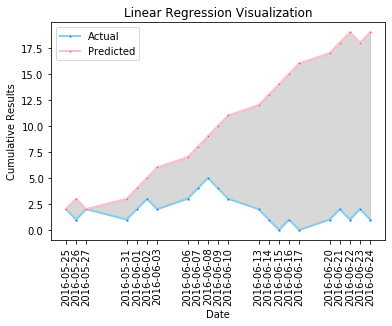

In [20]:
# Making the cumulative line chart for visualization & Showing the discrepancies  

plt.xlabel("Date")
plt.ylabel("Cumulative Results")
plt.title("Linear Regression Visualization")

plt.plot(cum_x_axis, cum_y_actual, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label = 'Actual')
plt.plot(cum_x_axis, cum_y_predict,  marker='o', markerfacecolor='red', markersize=2, color='pink', linewidth=2,label = 'Predicted')
plt.xticks(final_test_df['Date'], rotation = 'vertical')
plt.fill_between(cum_x_axis, cum_y_actual,cum_y_predict, color='grey', alpha='0.3')
plt.legend()

## Visualize Results Using Pie Chart

In [ ]:
# Step 1 vectorize all the data withoiut filt
#  know the specific rows you take out
#. also filter by date - On pandas apply the date filter, which gives you those data point
#. grab the index numbers that was filtered outy, save it
#.  apply a for loop to the list of index, and for each index (exclude that entire row)
#  Then you have a clean Train data set
#. Apply the for-loop again to create the Test_data set....

# Preparation step for the pie chart 

final_test_df['dif'] = final_test_df['Label'] - final_test_df['predicted_label']
final_test_df

right = 0
wrong = 0

for value in final_test_df['Label']:
    if value == -1:
        right += 1
    else:
        wrong += 1


In [ ]:
# Making the pie chart for visualization & Showing the right vs. wrong ratio  

plt.title("Right Vs. Wrong Predictions")
labels = ['Right Prediction', 'Wrong Prediction']
sizes = [right,wrong]
colors = ['pink','skyblue']
explode = (0,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

In [27]:
vec_words = vectorizer.get_feature_names()
model_coef = clf.coef_.tolist()[0]
coef_df = pd.DataFrame({'word': vec_words,
                        'coef': model_coef})
top_coef_df = coef_df.sort_values(['coef', 'word'], ascending=[0, 1])
top_coef_df.tail(10)

,word,coef
48659,world biggest,-0.619760
43137,swine flu,-0.622700
321,12 years,-0.635943
18266,gang raped,-0.640869
1121,50 000,-0.645706
8124,catholic church,-0.705462
11907,dark dubai,-0.722791
38729,saudi prince,-0.763181
48652,world bank,-0.770533
5866,bin laden,-0.771064
